In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic_df.describe(include = 'object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [5]:
titanic_df.shape

(891, 15)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic_df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

In [19]:
# deck_mode=titanic_df['deck'].mode()
# titanic_df['deck']=titanic_df['deck'].fillna(deck_mode)
titanic_df['deck']=titanic_df['deck'].dropna

In [23]:
# embark_town_mode=titanic_df['embark_town'].mode()
# titanic_df['embark_town']=titanic_df['embark_town'].fillna(embark_town_mode)
titanic_df['embark_town']=titanic_df['embark_town'].dropna

In [26]:
embarked_mode=titanic_df['embarked'].mode()
titanic_df['embarked']=titanic_df['embarked'].fillna(embarked_mode)

In [27]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
# Step 2: Visualize patterns in the data using Seaborn

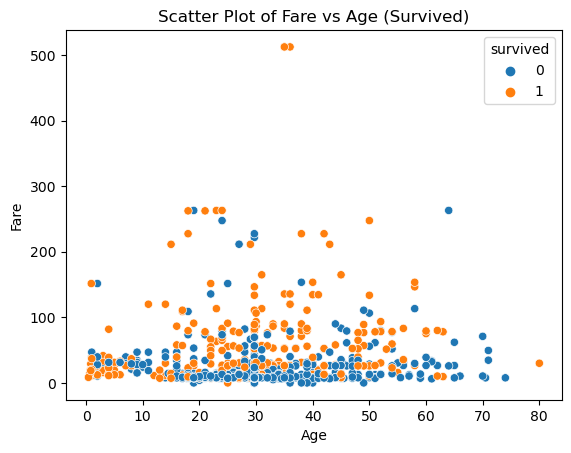

In [15]:
# Scatter plot
sns.scatterplot(data=titanic_df, x='age', y='fare', hue='survived')
plt.title('Scatter Plot of Fare vs Age (Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

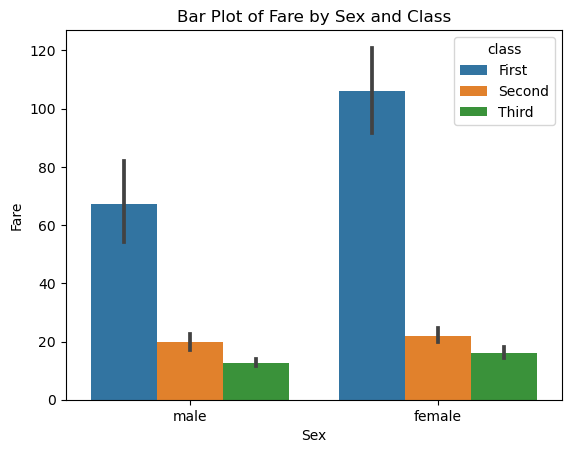

In [16]:
# Bar plot
sns.barplot(data=titanic_df, x='sex', y='fare', hue='class')
plt.title('Bar Plot of Fare by Sex and Class')
plt.xlabel('Sex')
plt.ylabel('Fare')
plt.show()

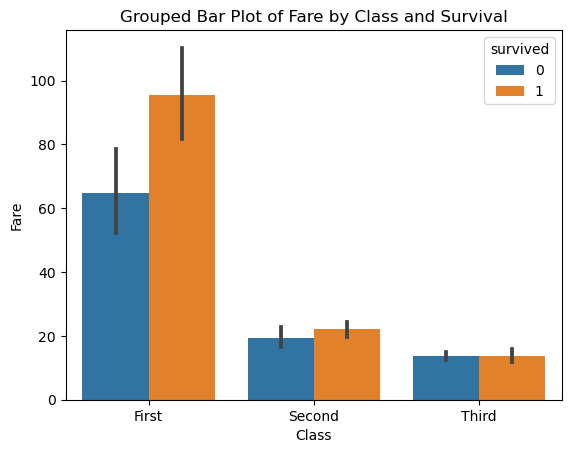

In [17]:
# Grouped bar plot
sns.barplot(data=titanic_df, x='class', y='fare', hue='survived')
plt.title('Grouped Bar Plot of Fare by Class and Survival')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

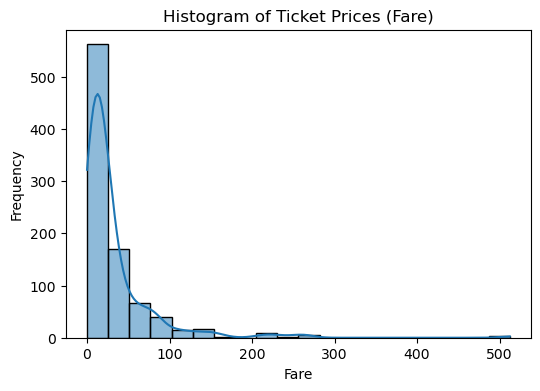

In [18]:
# Step 3: Plot a histogram to show the distribution of ticket prices
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_df, x='fare', bins=20, kde=True)
plt.title('Histogram of Ticket Prices (Fare)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()